In [390]:
library(plyr)
library(dplyr)
library(Hmisc)
library(viridis)  
library(naniar)
library(xtable)
library(schoRsch)
library(gmodels)
library(readr)
library(emmeans)
library(rstatix)
library(multcomp)
library(sandwich)
library(pim)
library(stargazer)
library(survival)
library(survminer)
library(finalfit)
library(ggplot2)

# 1. Data Wrangling and Feature engineering

In [391]:
countriesHDI= read.csv('countries.HDI.csv',sep=',',col.names = c('Country','HDI','index'))
head(countriesHDI)

Country,HDI,index
Australie,TH,2
Etats-Unis d'Amérique,TH,3
Pays-Bas,TH,4
Allemagne,TH,5
Nouvelle-Zélande,TH,6
Irlande,TH,7


In [392]:
effec1.quest.compil= read.csv('effec1.quest.compil.csv',sep=',')
head(effec1.quest.compil)

Student_ID,Gender,birth.year,Country,Diploma,Formation,CSP,How.heard,Exp.crea,Curiosity.MOOC,...,Eval.diffic,Estimated.hours,Part.labo,Plat.satisf,Peer.eval.relev,encad.diffic,Country_HDI,Country_HDI.fin,CSP.fin,Temps.dispo.fin
221,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
19178,une femme,1986,France,Bac+5 (Master ou équivalent),Droit,Cadres et professions intellectuelles,par un article ou un blog sur Internet,Je n'ai aucune expérience en création d'entreprise,4,...,NA,NA,NA,NA,NA,NA,TH,TH,Cadres et professions intellectuelles,Moins de deux heures
1086,une femme,1967,France,Bac+5 (Master ou équivalent),"Sciences sociales (économie\, sciences politiques\, sociologie\, etc)","Artisans, commerçants, chefs d'entreprise",par une communication de l'EMLYON,Je suis en train de créer mon entreprise (phase de démarrage),2,...,NA,NA,NA,NA,NA,NA,TH,TH,"Artisans, commerçants, chefs d'entreprise",Moins de deux heures
1948,une femme,1983,Allemagne,Bac ou équivalent,Droit,Employés,par une communication de Unow,Je n'ai aucune expérience en création d'entreprise,1,...,NA,NA,NA,NA,NA,NA,TH,TH,Employés,Moins de deux heures
16209,une femme,NA,Madagascar,Bac+3 (Licence ou équivalent),"Sciences naturelles (Agronomie\, biologie\, physique\, chimie\, etc)",Professions intermédiaires,par un ami ou une connaissance,J’ai un projet de création d’entreprise (phase de réflexion),1,...,NA,NA,NA,NA,NA,NA,B,B,Autre,Moins de deux heures
6685,un homme,1951,NA,Bac+5 (Master ou équivalent),Ingénierie et technologies,Retraités,par une communication de Unow,Je n'ai aucune expérience en création d'entreprise,1,...,Difficile,De 4 à 8 heures,"Non\, j’ai compris ce qu’était le Laboratoire mais je n’y ai pas participé",Très satisfaisante,3,NA,NA,NA,Autre,Plus de six heures


In [393]:
effec2.quest.compil=read.csv('effec2.quest.compil.csv',sep=',')
head(effec2.quest.compil)

Student_ID,Current.Score,Section,Gender,birth.year,Country,Diploma,Formation,CSP,How.heard,...,Eval.diffic,Estimated.hours,Part.labo,Plat.satisf,Peer.eval.relev,Country_HDI,Country_HDI.fin,CSP.fin,Temps.dispo.fin,EMLyon.et
32360,NA,"Laboratoire, Effectuation #2",une femme,1967,France,Bac+5 (Master ou équivalent),"Sciences humaines (histoire\, archéologie\, philosophie\, etc)",Cadres et professions intellectuelles,par un ami ou une connaissance,...,Très facile,De 1 à 2 heures,"Oui\, j'ai soumis un projet en tant que Porteur de Projet",Satisfaisante,5,TH,TH,Cadres et professions intellectuelles,Moins de deux heures,0
27582,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
27808,NA,Effectuation #2,un homme,1986,Haïti,Bac+3 (Licence ou équivalent),Management/Gestion d entreprise,En recherche d'emploi,autre,...,Moyen,Plus de 8 heures,"Oui\, je suis devenu Coach sur au moins un projet et j'ai laissé des commentaires",Très satisfaisante,5,B,B,En recherche d'emploi,Entre quatre et six heures,0
27532,NA,"Laboratoire, Effectuation #2",un homme,1975,France,Bac ou équivalent,Droit,Cadres et professions intellectuelles,par un ami ou une connaissance,...,Facile,De 2 à 4 heures,"Oui\, j'ai soumis un projet en tant que Porteur de Projet",Très satisfaisante,2,TH,TH,Cadres et professions intellectuelles,Entre deux et quatre heures,0
17343,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2630,NA,Effectuation #2,un homme,1957,Madagascar,Bac+5 (Master ou équivalent),Management/Gestion d entreprise,Cadres et professions intellectuelles,par un article ou un blog sur Internet,...,NA,NA,NA,NA,NA,B,B,Cadres et professions intellectuelles,Moins de deux heures,0


In [394]:
effec3.quest.compil=read.csv('effec3.quest.compil.csv',sep=',')
head(effec3.quest.compil)
length(colnames((effec3.quest.compil)))

Student_ID,Certif.bin,Section,Gender,birth.year,Country,Diploma,EMLYON.et,Formation,CSP,...,Incitation,Temps.Dispo,Exp.MOOC,Completion.proba,EMLyon,Country_HDI,Country_HDI.fin,age,CSP.fin,Temps.dispo.fin
68029,1,MOOC Effectuation #3,un homme,1982,France,Bac+5 (Master ou équivalent),Non,"Mathématiques\, informatique","Artisans, commerÃ§ants, chefs d'entreprise",...,1,Entre deux et quatre heures,"Non, c'est ma première participation Ã un MOOC",5,Non,TH,TH,31,"Artisans, commerÃ§ants, chefs d'entreprise",Entre deux et quatre heures
66198,1,"Laboratoire, Laboratoire Effectuation #3, MOOC Effectuation #3",un homme,1994,Maroc,"Bac+2 (Deug, IUT, BTS ou équivalent)",Non,"Sciences sociales (économie\, sciences politiques\, sociologie\, etc)",Etudiants,...,4,Entre deux et quatre heures,"Non, c'est ma première participation Ã un MOOC",5,Non,H,H&M,19,Etudiants,Entre deux et quatre heures
68052,1,MOOC Effectuation #3,un homme,1988,Maroc,Bac+5 (Master ou équivalent),Oui,"Mathématiques\, informatique",Cadres et professions intellectuelles,...,4,Entre deux et quatre heures,"Non, c'est ma première participation Ã un MOOC",4,Oui,H,H&M,25,Cadres et professions intellectuelles,Entre deux et quatre heures
14161,1,"Laboratoire, MOOC Effectuation #3",un homme,1984,Niger,Bac+5 (Master ou équivalent),Non,Ingénierie et technologies,Employés,...,NA,Entre une et deux heures,"Oui, dont certains intégralement",3,Non,B,B,29,Employés,Moins de deux heures
64444,1,"MOOC Effectuation #3, Laboratoire",un homme,1989,Côte d'Ivoire,"Bac+2 (Deug, IUT, BTS ou équivalent)",Non,Management/Gestion d'entreprise,Cadres et professions intellectuelles,...,5,Entre deux et quatre heures,"Non, c'est ma première participation Ã un MOOC",5,Non,B,B,24,Cadres et professions intellectuelles,Entre deux et quatre heures
64819,1,"Laboratoire, Laboratoire Effectuation #3, MOOC Effectuation #3",un homme,1964,Belgique,Bac+5 (Master ou équivalent),Non,"Mathématiques\, informatique",Cadres et professions intellectuelles,...,3,Entre deux et quatre heures,"Non, c'est ma première participation Ã un MOOC",5,Non,TH,TH,49,Cadres et professions intellectuelles,Entre deux et quatre heures


[1] 26

In [395]:
usages.effec1=read.csv('usages.effec1.csv',sep=',')
head(usages.effec1)
length(colnames(usages.effec1))

Student_ID,Exam.score,Exam.bin,Assignment.score,Assignment.bin,Quizz.1.score,Quizz.1.bin,Quizz.2.score,Quizz.2.bin,Quizz.3.score,...,Post.forum.4,Post.forum.4.2,view.forum.4,view.forum.4.2,Post.forum.5,Post.forum.5.2,view.forum.5,view.forum.5.2,last.video,last.quizz
28,NA,0,NA,0,NA,0,NA,0,NA,...,0,0,0,0,0,0,0,0,1,0
36,NA,0,NA,0,NA,0,NA,0,NA,...,0,0,0,0,0,0,0,0,0,0
45,NA,0,NA,0,16,1,20,1,18,...,0,0,1,1,0,0,1,1,34,5
83,NA,0,60,1,13,1,20,1,18,...,0,0,1,0,0,0,1,0,29,5
84,NA,0,NA,0,18,1,20,1,NA,...,0,0,0,0,0,0,0,0,23,2
87,NA,0,NA,0,NA,0,NA,0,NA,...,0,0,0,0,0,0,0,0,2,0


[1] 73

In [396]:
usages.effec2=read.csv('usages.effec2.csv',sep=',')
head(usages.effec2)
length(colnames(usages.effec2))

Student_ID,Exam.score,Exam.bin,Assignment.score,Assignment.bin,Quizz.1.score,Quizz.1.bin,Quizz.2.score,Quizz.2.bin,Quizz.3.score,...,Post.forum.4.2,view.forum.4,view.forum.4.2,Post.forum.5,Post.forum.5.2,view.forum.5,view.forum.5.2,last.video,last.quizz,Assignment.choice
15,NA,0,NA,0,NA,0,NA,0,NA,...,0,1,0,0,0,0,0,3,0,0
26,NA,0,NA,0,20.0,1,NA,0,NA,...,0,0,0,0,0,0,0,3,1,0
151,NA,0,NA,0,NA,0,NA,0,NA,...,0,0,0,0,0,0,0,0,0,0
260,NA,0,NA,0,17.1,1,16.33333,1,NA,...,0,0,0,0,0,0,0,14,2,0
263,NA,0,NA,0,14.6,1,11.00000,1,NA,...,0,0,0,0,0,0,0,7,2,0
430,NA,0,NA,0,NA,0,NA,0,NA,...,0,0,0,0,0,0,0,8,0,0


[1] 74

In [397]:
usages.effec3=read.csv('usages.effec3.csv',sep=',')
head(usages.effec3)
length(colnames(usages.effec3))

Student_ID,Exam.score,Exam.bin,Assignment.score,Assignment.bin,Quizz.1.score,Quizz.1.bin,Quizz.2.score,Quizz.2.bin,Quizz.3.score,...,view.forum.4.2,Post.forum.5,Post.forum.5.2,view.forum.5,view.forum.5.2,last.video,last.quizz,Assignment.choice,Post.forum.fonc.cours,view.forum.fonc.cours
15,NA,0,NA,0,NA,0,NA,0,NA,...,0,0,0,0,0,2,0,0,0,0
34,NA,0,NA,0,NA,0,NA,0,NA,...,0,0,0,0,0,0,0,0,0,0
88,NA,0,NA,0,NA,0,NA,0,NA,...,0,0,0,0,0,2,0,0,0,0
95,NA,0,NA,0,NA,0,NA,0,NA,...,0,0,0,0,0,2,0,0,0,0
115,NA,0,NA,0,NA,0,NA,0,NA,...,0,0,0,0,0,0,0,0,0,0
118,38.45,1,NA,0,17.1,1,17.66667,1,16.66667,...,0,0,0,0,0,0,5,0,0,0


[1] 76

## combining usage 1,2,3 rbind

In [398]:
usages.effec1 =filter(usages.effec1,Student_ID %nin% usages.effec2$Student_ID)

In [399]:
usages.effec1_usages.effec2=(rbind.fill(usages.effec1,usages.effec2))

In [400]:
usages.effec1_usages.effec2=filter(usages.effec1_usages.effec2,Student_ID %nin% usages.effec3$Student_ID)

In [401]:
usages1_2_3=(rbind.fill(usages.effec1_usages.effec2,usages.effec3))

In [402]:
dim(usages1_2_3)

[1] 14974    76

## combining effec 1,2,3 rbind

In [403]:
effec1.quest.compil = filter(effec1.quest.compil,Student_ID %nin% effec2.quest.compil$Student_ID)

In [404]:
effec1_2=(rbind.fill(effec1.quest.compil,effec2.quest.compil))

In [405]:
effec1_2 = filter(effec1_2,Student_ID %nin% effec3.quest.compil$Student_ID)

In [406]:
effec1_2_3=(rbind.fill(effec1_2,effec3.quest.compil))

In [407]:
dim(effec1_2_3)

[1] 16526    44

## treating countries

In [408]:
levels(countriesHDI$HDI) <- c(levels(countriesHDI$HDI), "I") 
countriesHDI$HDI[countriesHDI$HDI =="M"]  <- "I" 
countriesHDI$HDI[countriesHDI$HDI =="H"]  <- "I" 

## joining effec and usage

In [409]:
length(usages1_2_3$Student_ID)

[1] 14974

In [410]:
length(effec1_2_3$Student_ID)

[1] 16526

In [411]:
full_thing_withoutHDI = full_join(usages1_2_3,effec1_2_3,fill=NULL,by = "Student_ID")

In [412]:
dim((full_thing_withoutHDI))

[1] 16943   119

# 1600 by exam.bin


In [413]:
levels(full_thing_withoutHDI$Country_HDI) <- c(levels(full_thing_withoutHDI$Country_HDI), "I") 
full_thing_withoutHDI$Country_HDI[full_thing_withoutHDI$Country_HDI =="M"]  <- "I" 
full_thing_withoutHDI$Country_HDI[full_thing_withoutHDI$Country_HDI =="H"]  <- "I" 
full_thing_withoutHDI$HDI <- full_thing_withoutHDI$'Country_HDI'

In [414]:
df = full_join(x=full_thing_withoutHDI,y=countriesHDI[c("Country","HDI")],by=c("Country",'HDI'))


In [415]:
head(df)

Student_ID,Exam.score,Exam.bin,Assignment.score,Assignment.bin,Quizz.1.score,Quizz.1.bin,Quizz.2.score,Quizz.2.bin,Quizz.3.score,...,Current.Score,Section,Mot,EMLyon,Proba.reco,EMLyon.et,Certif.bin,EMLYON.et,age,HDI
28,NA,0,NA,0,NA,0,NA,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
36,NA,0,NA,0,NA,0,NA,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
45,NA,0,NA,0,16,1,20,1,18,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,TH
83,NA,0,60,1,13,1,20,1,18,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,I
84,NA,0,NA,0,18,1,20,1,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,B
87,NA,0,NA,0,NA,0,NA,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,TH


In [416]:
dim(df)

[1] 17054   120

# Cleaning and Maniputlation

## Subsetting necessary columns

In [417]:
df2_NecCol = df[c('Student_ID' ,'Exam.score', 'Assignment.score' ,'Assignment.bin', 'Quizz.1.score', 'Quizz.1.bin', 
                  'Quizz.2.score', 'Quizz.2.bin' ,'Quizz.3.score', 'Quizz.3.bin' ,'Quizz.4.bin' ,'Quizz.4.score', 'Quizz.5.bin', 
                  'Quizz.5.score' ,'Intro.MOOC' ,'Prez.sem.1' ,'S1.L1' ,'S1.L2', 'S1.L3', 'S1.L4' ,'S1.L5' ,'S1.L6' ,'Prez.sem.2', 
                  'S2.L1', 'S2.L2' ,'S2.L3', 'S2.L4','S2.L5' ,'S2.L6' ,'Prez.sem.3', 'S3.L1.1', 'S3.L1.2' ,'S3.L2', 'S3.L3' ,'S3.L4',
                  'S3.L5' ,'Prez.sem.4', 'S4.L1.1' ,'S4.L1.2', 'S4.L2', 'S4.L3' ,'S4.L4', 'S4.L5' ,'Prez.sem.5' ,'S5.L1.1', 'S5.L1.2',
                  'S5.L2' ,'S5.L3', 'S5.L4' ,'S5.L5' ,'last.video', 'last.quizz' ,'Assignment.choice'
                  ,'Gender' ,'birth.year' ,'Country' ,'Diploma' ,'Formation','How.heard' ,'Exp.crea', 'Curiosity.MOOC','Completion.proba',
                  'Instit.brand' ,'motiv.princ' ,'Satisf','Estimated.hours','Plat.satisf','Country_HDI', 'CSP.fin' ,'Temps.dispo.fin', 
                  'Current.Score' ,'Section' ,'Mot', 'Proba.reco'
                  ,'Certif.bin', 'age','Certif.bin','Exam.bin','CSP')]

In [418]:
dim(df2_NecCol)

[1] 17054    79

In [419]:

options(repr.plot.width=10, repr.plot.height=5)

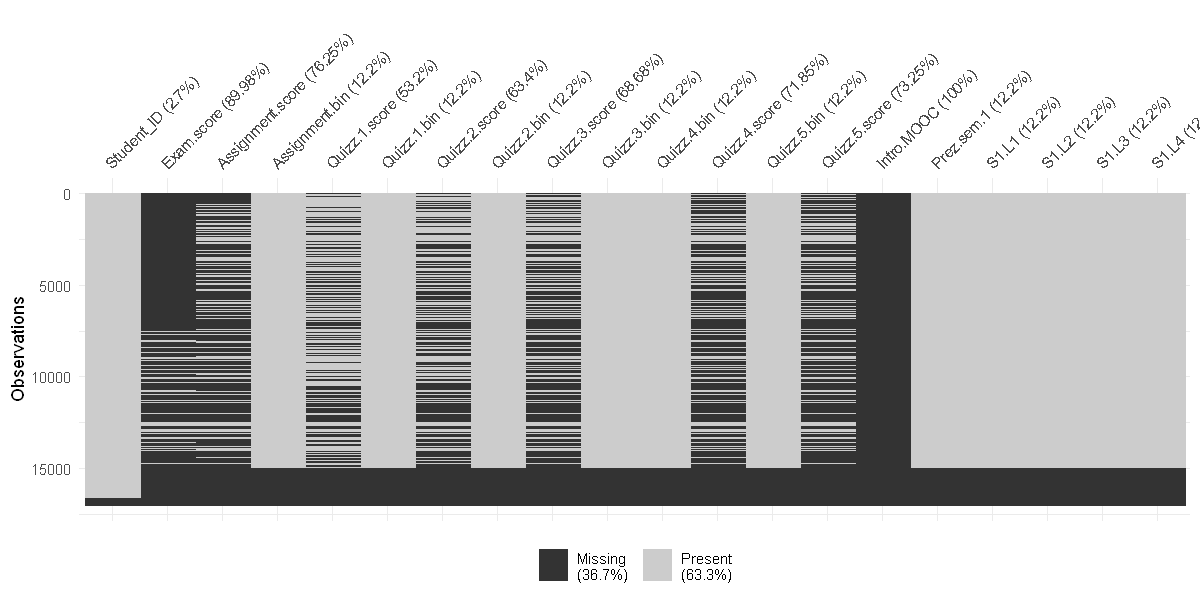

In [420]:
plot(vis_miss(df2_NecCol[c(1:20)], warn_large_data = FALSE))

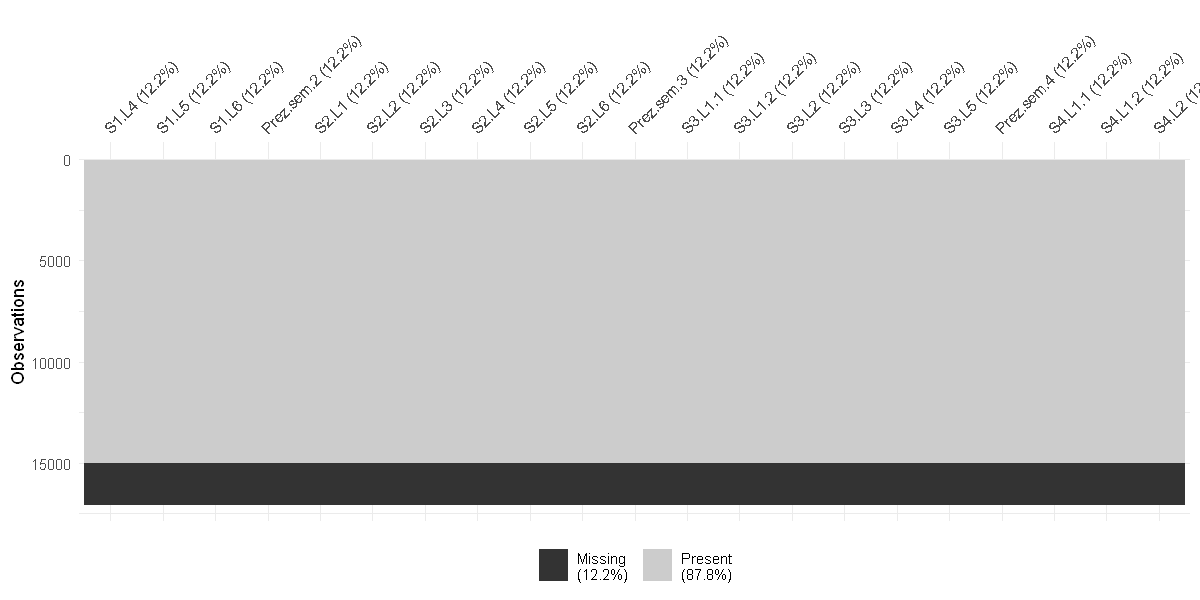

In [421]:
plot(vis_miss(df2_NecCol[c(20:40)], warn_large_data = FALSE))

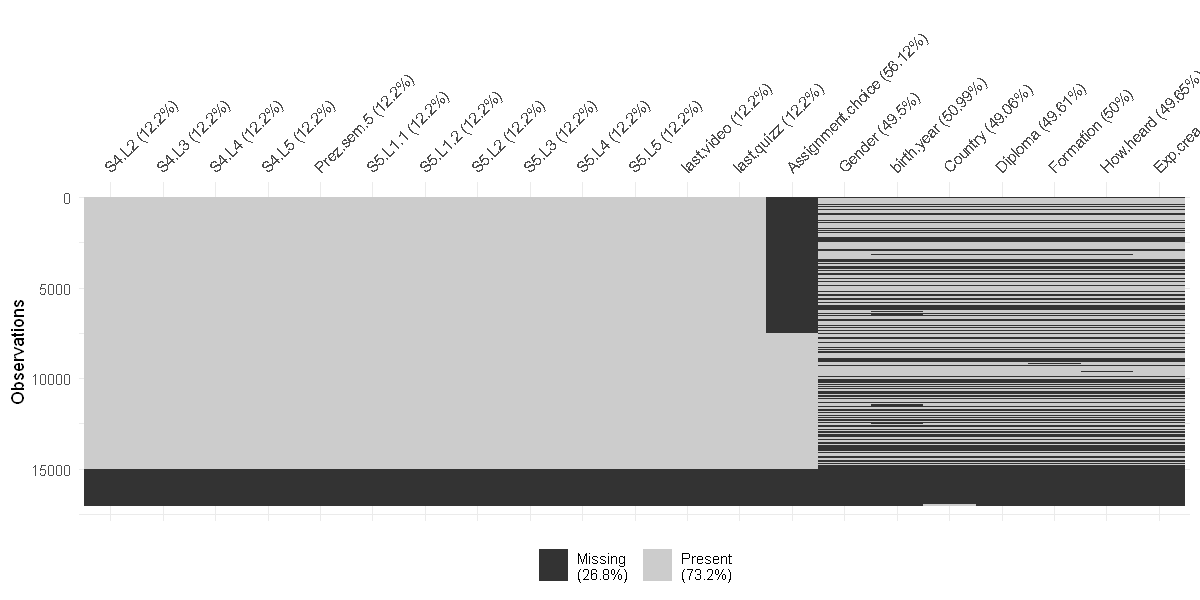

In [422]:
plot(vis_miss(df2_NecCol[c(40:60)], warn_large_data = FALSE))

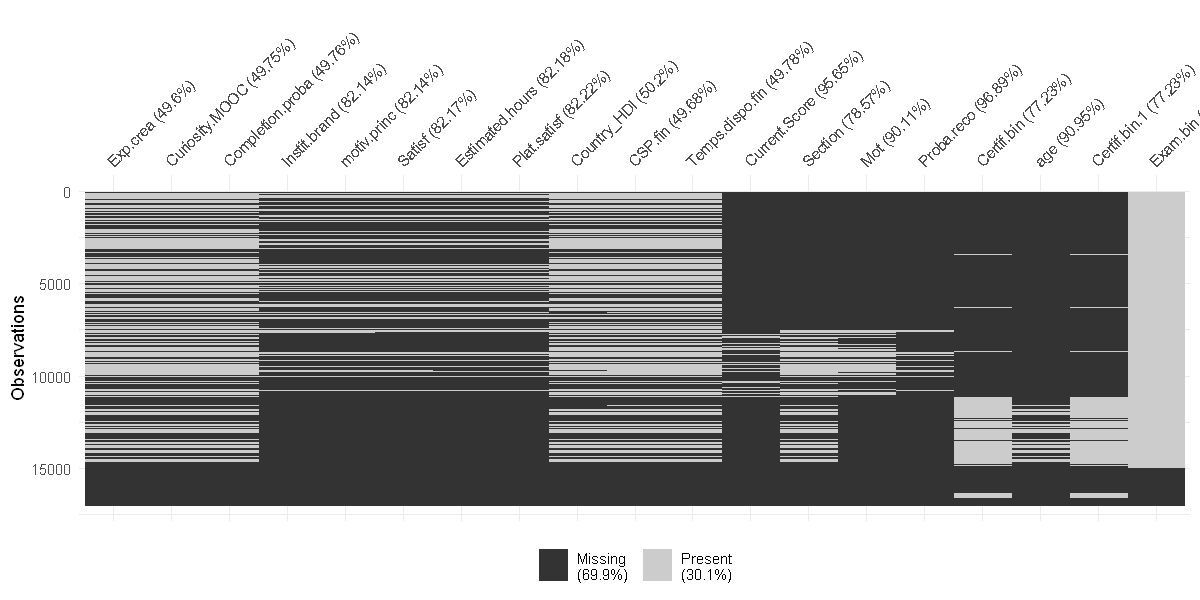

In [423]:
plot(vis_miss(df2_NecCol[c(60:78)], warn_large_data = FALSE))

## remove columns with more than aprox. 60% of missing data

In [424]:
df2_NecCol_clean = df[c('Student_ID' ,'Assignment.bin', 'Quizz.1.score', 'Quizz.1.bin','Quizz.2.score', 'Quizz.2.bin'
                  ,'Quizz.3.score', 'Quizz.3.bin' ,'Quizz.4.bin' ,'Quizz.4.score', 'Quizz.5.bin', 
                  'Quizz.5.score'  ,'Prez.sem.1' ,'S1.L1' ,'S1.L2', 'S1.L3', 'S1.L4' ,'S1.L5' ,'S1.L6' ,'Prez.sem.2', 
                  'S2.L1', 'S2.L2' ,'S2.L3', 'S2.L4','S2.L5' ,'S2.L6' ,'Prez.sem.3', 'S3.L1.1', 'S3.L1.2' ,'S3.L2', 'S3.L3' ,'S3.L4',
                  'S3.L5' ,'Prez.sem.4', 'S4.L1.1' ,'S4.L1.2', 'S4.L2', 'S4.L3' ,'S4.L4', 'S4.L5' ,'Prez.sem.5' ,'S5.L1.1', 'S5.L1.2',
                  'S5.L2' ,'S5.L3', 'S5.L4' ,'S5.L5' ,'last.video', 'last.quizz','Gender' ,'birth.year' ,'Country' ,'Diploma' ,
                  'Formation','How.heard' ,'Exp.crea', 'Curiosity.MOOC','Completion.proba','Country_HDI','Country','CSP.fin' ,
                  'Temps.dispo.fin',  'age','Certif.bin','Exam.bin','HDI','CSP')]

In [425]:
unique(df2_NecCol_clean$CSP)

[1] <NA>                                                            
 [2] Cadres et professions intellectuelles                           
 [3] Employés                                                        
 [4] En recherche d'emploi                                           
 [5] Artisans, commerçants, chefs d'entreprise                       
 [6] Professions intermédiaires                                      
 [7] Etudiants                                                       
 [8] Inactif (autre que étudiant, retraité, ou en recherche d'emploi)
 [9] Retraités                                                       
[10] Agriculteurs-exploitants                                        
[11] Ouvriers                                                        
[12] Artisans, commerÃ§ants, chefs d'entreprise                      
11 Levels: Agriculteurs-exploitants ...

In [426]:
videos <- c('Prez.sem.1','S1.L1' ,'S1.L2', 'S1.L3', 'S1.L4' ,'S1.L5' ,'S1.L6' ,'Prez.sem.2', 
                  'S2.L1', 'S2.L2' ,'S2.L3', 'S2.L4','S2.L5' ,'S2.L6' ,'Prez.sem.3', 'S3.L1.1', 'S3.L1.2' ,'S3.L2', 'S3.L3' ,'S3.L4',
                  'S3.L5' ,'Prez.sem.4', 'S4.L1.1' ,'S4.L1.2', 'S4.L2', 'S4.L3' ,'S4.L4', 'S4.L5' ,'Prez.sem.5' ,'S5.L1.1', 'S5.L1.2',
                  'S5.L2' ,'S5.L3', 'S5.L4' ,'S5.L5')
videos_score= list()

x <-rowSums(df2_NecCol_clean[videos], na.rm = TRUE)
# # adding the behaviour index to the dataset 
df2_NecCol_clean$n.videos <- x
df2_NecCol_clean$behaviour.index.percentage <- x/35
# #add the columns for survival analysis

x <-rowSums(df[videos], na.rm = TRUE)
# adding the behaviour index to the dataset 
df$n.videos <- x
df$behaviour.index.percentage <- x/35

In [427]:
summary(df$n.videos)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   2.000   9.572  16.000  35.000 

In [428]:
age=2021 - df2_NecCol_clean$birth.year

In [429]:
str(df2_NecCol_clean$birth.year)

 num [1:17054] NA NA 1956 1977 1988 ...


In [430]:
listOfAge = c()
for (i in df2_NecCol_clean$birth.year){
    if (is.na(i)==FALSE){
        
        if(i>100 && i >1900 ){  
            listOfAge <- append(listOfAge,2021-i)
        }else if ( i < 100){
        listOfAge <- append(listOfAge,round(i,0))
        }
    }
    else {listOfAge <- append(listOfAge,round(i,0))}
}

In [431]:
df2_NecCol_clean$age=listOfAge

In [432]:
df2_NecCol_clean$agegroup <- cut(df2_NecCol_clean$age , c(20,30,40,50,60,100), include.lowest = TRUE)

In [433]:
df2_NecCol_clean$agegroup3 <- cut(df2_NecCol_clean$age , c(0,30,50,80,100))

In [434]:
unique(df2_NecCol_clean$agegroup3 )

[1] <NA>     (50,80]  (30,50]  (0,30]   (80,100]
Levels: (0,30] (30,50] (50,80] (80,100]

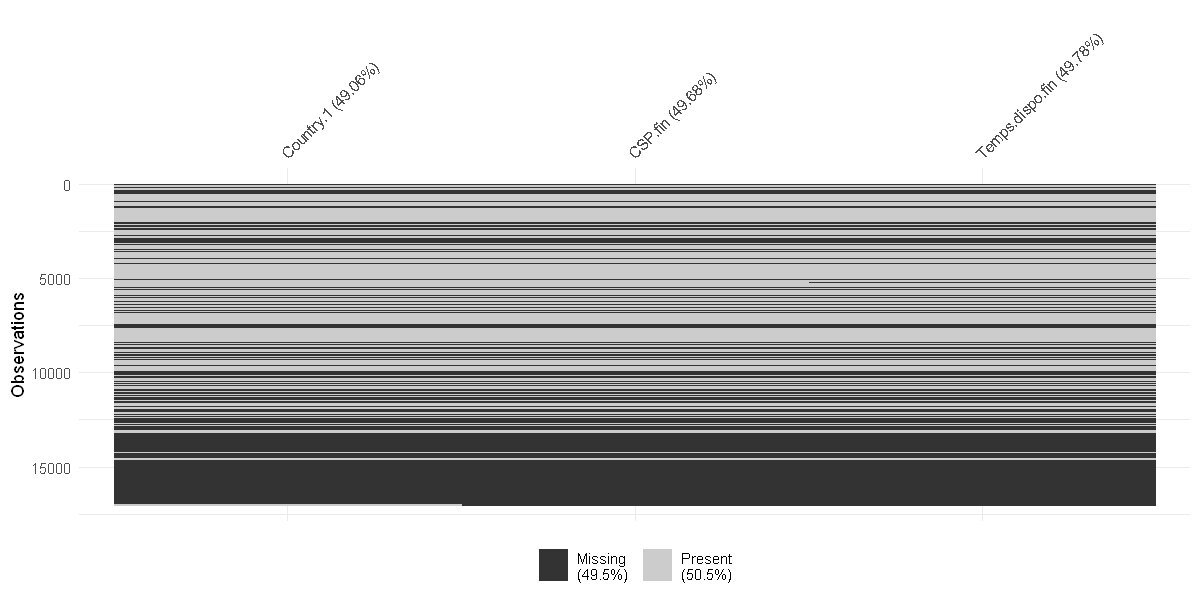

In [435]:
plot(vis_miss(df2_NecCol_clean[60:62], warn_large_data = FALSE))

# 2. Describing behavior in the courses

## Number of Users by country

In [436]:
sort(table(df2_NecCol_clean$Country), decreasing=TRUE)[1:10]


                     France               Côte d'Ivoire 
                       6510                         269 
                      Maroc                    Cameroun 
                        248                         146 
                    Tunisie                     Algérie 
                        125                         117 
Canada francophone (Québec)                     Sénégal 
                        113                         103 
                      Haïti                    Belgique 
                         98                          82 

In [437]:
levels(df2_NecCol_clean$Country) <- c(levels(df2_NecCol_clean$Country), "Canada") 
df2_NecCol_clean$Country[df2_NecCol_clean$Country =="Canada francophone (Québec)"]  <- "Canada" 
df2_NecCol_clean$Country[df2_NecCol_clean$Country =="Canada anglophone"]  <- "Canada" 

levels(df2_NecCol_clean$Country) <- c(levels(df2_NecCol_clean$Country), 'USA')
df2_NecCol_clean$Country[df2_NecCol_clean$Country =="États-Unis d\'Amérique'"]  <- "USA" 
df2_NecCol_clean$Country[df2_NecCol_clean$Country =="Ã‰tats-Unis d\'Amérique"]  <- "USA" 

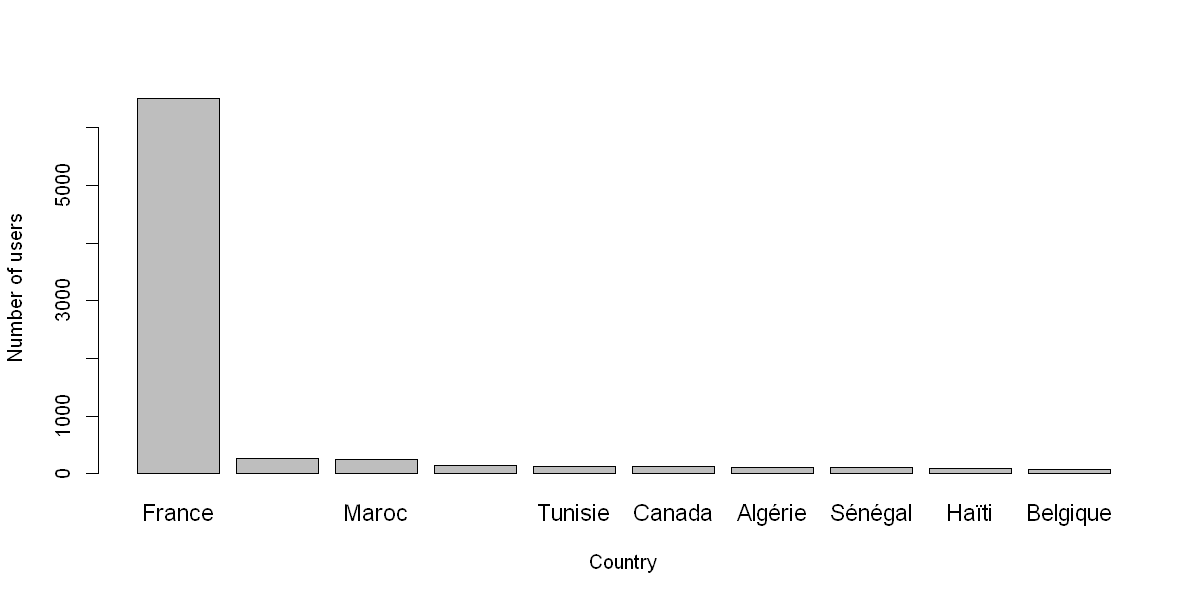

In [438]:
# Simple Bar Plot
counts <- sort(table(df2_NecCol_clean$Country), decreasing=TRUE)[1:10]
barplot(counts,xlab="Country",ylab="Number of users",cex.axis=1, cex.names=1.15)
#, main="Countries with the greatest number of users enrolled in the MOOC"

# Presenting the proportions of learners activity

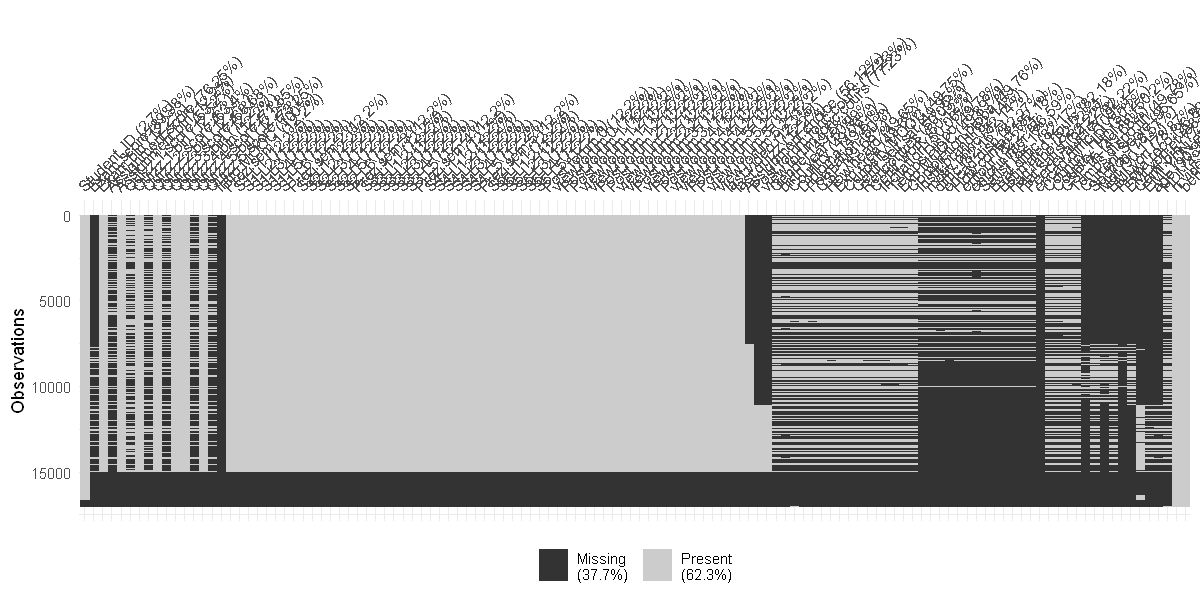

In [439]:
plot(vis_miss(df, warn_large_data = FALSE))

### subsetting the different categories “completers”, “disengaging learners”,“auditing learners”, and "bystanders" 

In [440]:
completers <- subset(df2_NecCol_clean, Exam.bin == 1)

auditing <- df2_NecCol_clean[which(df2_NecCol_clean$Quizz.1.bin ==0
                                    & df2_NecCol_clean$Quizz.2.bin ==0
                                    & df2_NecCol_clean$Quizz.3.bin ==0
                                    & df2_NecCol_clean$Quizz.4.bin ==0
                                    & df2_NecCol_clean$Quizz.5.bin ==0
                                    & df2_NecCol_clean$Assignment.bin ==0
                                    & df2_NecCol_clean$behaviour.index.percentage > 0.1),]
bystanders <- df2_NecCol_clean[which(df2_NecCol_clean$Quizz.1.bin ==0
                                    & df2_NecCol_clean$Quizz.2.bin ==0
                                    & df2_NecCol_clean$Quizz.3.bin ==0
                                    & df2_NecCol_clean$Quizz.4.bin ==0
                                    & df2_NecCol_clean$Quizz.5.bin ==0
                                    & df2_NecCol_clean$Assignment.bin ==0
                                    & df2_NecCol_clean$behaviour.index.percentage <= 0.1),]

bystanders<-anti_join(bystanders, auditing)


disengaging <- anti_join(df2_NecCol_clean, do.call("rbind", list(completers,auditing,bystanders)))
disengaging<-anti_join(disengaging, completers)


completers$behaviour = 'Completer'


disengaging$behaviour = 'Disenganger'

auditing$behaviour = 'Auditer'

bystanders$behaviour = 'Bystander'
df_categories <- do.call("rbind", list(completers,auditing,bystanders,disengaging))


Joining, by = c("Student_ID", "Assignment.bin", "Quizz.1.score", "Quizz.1.bin", "Quizz.2.score", "Quizz.2.bin", "Quizz.3.score", "Quizz.3.bin", "Quizz.4.bin", "Quizz.4.score", "Quizz.5.bin", "Quizz.5.score", "Prez.sem.1", "S1.L1", "S1.L2", "S1.L3", "S1.L4", "S1.L5", "S1.L6", "Prez.sem.2", "S2.L1", "S2.L2", "S2.L3", "S2.L4", "S2.L5", "S2.L6", "Prez.sem.3", "S3.L1.1", "S3.L1.2", "S3.L2", "S3.L3", "S3.L4", "S3.L5", "Prez.sem.4", "S4.L1.1", "S4.L1.2", "S4.L2", "S4.L3", "S4.L4", "S4.L5", "Prez.sem.5", "S5.L1.1", "S5.L1.2", "S5.L2", "S5.L3", "S5.L4", "S5.L5", "last.video", "last.quizz", "Gender", "birth.year", "Country", "Diploma", "Formation", "How.heard", "Exp.crea", "Curiosity.MOOC", "Completion.proba", "Country_HDI", "Country.1", "CSP.fin", "Temps.dispo.fin", "age", "Certif.bin", "Exam.bin", "HDI", "CSP", "n.videos", "behaviour.index.percentage", "agegroup", "agegroup3")
Joining, by = c("Student_ID", "Assignment.bin", "Quizz.1.score", "Quizz.1.bin", "Quizz.2.score", "Quizz.2.bin", "Quizz

In [441]:
df_categories <- do.call("rbind", list(completers,auditing,bystanders,disengaging))
head(df_categories)

,Student_ID,Assignment.bin,Quizz.1.score,Quizz.1.bin,Quizz.2.score,Quizz.2.bin,Quizz.3.score,Quizz.3.bin,Quizz.4.bin,Quizz.4.score,...,age,Certif.bin,Exam.bin,HDI,CSP,n.videos,behaviour.index.percentage,agegroup,agegroup3,behaviour
1205,11042,0,14,1,20,1,20.00,1,1,20,...,53,NA,1,TH,"Artisans, commerçants, chefs d'entreprise",3,0.08571429,"(50,60]","(50,80]",Completer
1444,11476,0,20,1,20,1,20.00,1,1,20,...,29,NA,1,TH,Etudiants,31,0.88571429,"[20,30]","(0,30]",Completer
1495,11577,0,17,1,18,1,17.33,1,1,20,...,56,NA,1,TH,Employés,29,0.82857143,"(50,60]","(50,80]",Completer
1598,11748,0,16,1,20,1,19.33,1,1,20,...,30,NA,1,TH,Etudiants,34,0.97142857,"[20,30]","(0,30]",Completer
1629,11782,0,17,1,20,1,15.33,1,1,16,...,NA,NA,1,TH,Cadres et professions intellectuelles,5,0.14285714,NA,NA,Completer
1713,11879,0,19,1,20,1,18.00,1,1,20,...,35,NA,1,TH,Cadres et professions intellectuelles,34,0.97142857,"(30,40]","(30,50]",Completer


## adding the column behaviour 

In [442]:
df_new = do.call("rbind", list(completers, disengaging, auditing,bystanders))

In [443]:
dim(df2_NecCol_clean)

[1] 17054    71

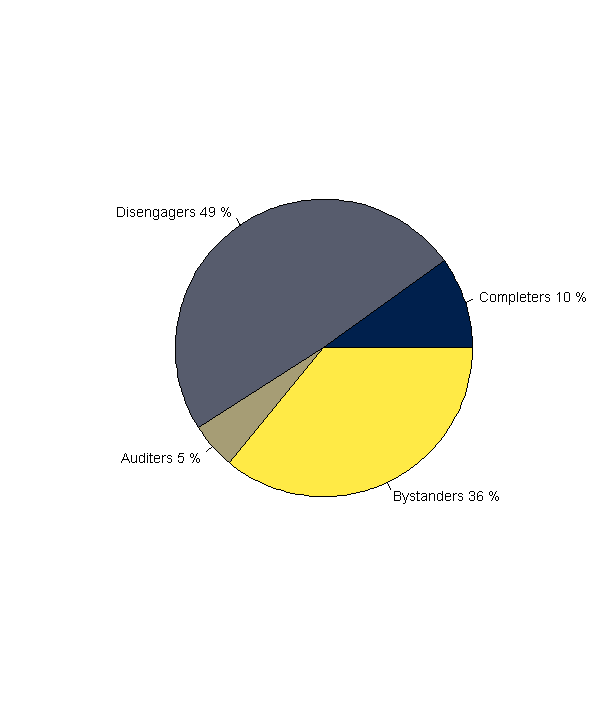

In [444]:
options(repr.plot.width=5, repr.plot.height=6)
Percent = c(round(nrow(completers[completers$Countr])/nrow(df_new)*100),round(nrow(disengaging)/nrow(df_new)*100),round(nrow(auditing)/nrow(df_new)*100),round(nrow(bystanders)/nrow(df_new)*100))
Company <- c("Completers", "Disengagers", "Auditers", "Bystanders"); 
pie(x = Percent, label=paste(Company, Percent, "%"), col=viridis(4, option = "E"), cex = 0.7 ,cex.lab=10) 
#, main="Learners engagment behaviour"

In [445]:
print(nrow(completers))
print(nrow(disengaging))
print(nrow(auditing))
print(nrow(bystanders))

[1] 1708
[1] 8425
[1] 774
[1] 6149


# 3. Linear Model

# T-test

In [446]:
(xtable(lm(n.videos~ Gender, data = df2_NecCol_clean)))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),16.558119,0.1758582,94.156102,0.000000000
Genderune femme,1.037528,0.3057691,3.393176,0.000693986


In [447]:
T.Test <- t.test(n.videos~ Gender, data = df2_NecCol_clean)
T.Test


	Welch Two Sample t-test

data:  n.videos by Gender
t = -3.3705, df = 5574.8, p-value = 0.0007555
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.6409962 -0.4340603
sample estimates:
 mean in group un homme mean in group une femme 
               16.55812                17.59565 


In [448]:
stargazer_htest = function (data, ...) {
    summary = data.frame(`Test statistic` = data$statistic,
                         DF = data$parameter,
                         `p value` = data$p.value,
                         `Alternative hypothesis` = data$alternative,
                         check.names = FALSE)
    stargazer(summary, flip = TRUE, summary = FALSE,
              notes = paste(data$method, data$data.name, sep = ': '), ...)
}

In [449]:
stargazer_htest(T.Test)


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: mar., janv. 11, 2022 - 00:07:38
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}} cc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & t \\ 
\hline \\[-1.8ex] 
Test statistic & -3.370452 \\ 
DF & 5574.774 \\ 
p value & 0.0007555496 \\ 
Alternative hypothesis & two.sided \\ 
\hline \\[-1.8ex] 
\multicolumn{2}{l}{Welch Two Sample t-test: n.videos by Gender} \\ 
\end{tabular} 
\end{table} 


## one and two way anova HDI and n.videos

In [450]:
options(scipen = 0)  

In [451]:
no.na.data <- na.omit(df2_NecCol_clean[c("Gender", "HDI","n.videos",'CSP','age','agegroup',"agegroup3",'Exam.bin')])

In [452]:
(xtable(lm(n.videos~ HDI, data = no.na.data)))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),8.771700,0.4486738,19.550285,3.230049e-83
HDITH,9.511811,0.4758277,19.990033,7.889380e-87
HDII,4.469137,0.7048198,6.340823,2.406984e-10


In [453]:
anova(lm(n.videos~ HDI, data = no.na.data))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
HDI,2,76125.73,38062.8626,224.8247,9.050466e-96
Residuals,8155,1380642.86,169.3002,NA,NA


In [454]:
print(xtable(anova(lm(n.videos~ HDI, data = no.na.data))))

% latex table generated in R 3.6.1 by xtable 1.8-4 package
% Tue Jan 11 00:07:38 2022
\begin{table}[ht]
\centering
\begin{tabular}{lrrrrr}
  \hline
 & Df & Sum Sq & Mean Sq & F value & Pr($>$F) \\ 
  \hline
HDI & 2 & 76125.73 & 38062.86 & 224.82 & 0.0000 \\ 
  Residuals & 8155 & 1380642.86 & 169.30 &  &  \\ 
   \hline
\end{tabular}
\end{table}


### linear model of number of videos watched by gender and HDI

In [455]:
mod <-lm(n.videos~Gender+HDI, data = df2_NecCol_clean)
summary(mod)


Call:
lm(formula = n.videos ~ Gender + HDI, data = df2_NecCol_clean)

Residuals:
   Min     1Q Median     3Q    Max 
-18.45 -11.45  -2.45  14.76  26.30 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.6972     0.4332  20.076  < 2e-16 ***
Genderune femme   0.2121     0.3031   0.700    0.484    
HDITH             9.5405     0.4624  20.634  < 2e-16 ***
HDII              4.4439     0.6822   6.514 7.73e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.99 on 8478 degrees of freedom
  (8572 observations deleted due to missingness)
Multiple R-squared:  0.05479,	Adjusted R-squared:  0.05446 
F-statistic: 163.8 on 3 and 8478 DF,  p-value: < 2.2e-16


In [456]:
#latex table
(xtable((mod)))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),8.6972378,0.4332190,20.0758446,1.276379e-87
Genderune femme,0.2121116,0.3031072,0.6997905,4.840773e-01
HDITH,9.5404665,0.4623731,20.6336954,2.472357e-92
HDII,4.4439322,0.6822092,6.5140315,7.732676e-11


## using step

In [457]:
model <- lm(formula=as.formula(paste(paste("n.videos",'~', sep=''),
paste(c("Gender", "HDI",'CSP'),collapse='+'), sep='')),
            no.na.data)


In [458]:
xtable(summary(model))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),5.2308128,4.9127675,1.0647385,2.870258e-01
Genderune femme,0.1236932,0.3102689,0.3986645,6.901509e-01
HDITH,9.5684619,0.4910637,19.4851729,1.097301e-82
HDII,4.5756312,0.7108328,6.4370007,1.287520e-10
"CSPArtisans, commerçants, chefs d'entreprise",2.1267991,4.9476589,0.4298597,6.673091e-01
CSPCadres et professions intellectuelles,3.7166200,4.9252046,0.7546123,4.505035e-01
CSPEmployés,3.3142060,4.9379970,0.6711640,5.021351e-01
CSPEn recherche d'emploi,4.8635630,4.9347996,0.9855644,3.243762e-01
CSPEtudiants,2.6056056,4.9297398,0.5285483,5.971332e-01
"CSPInactif (autre que étudiant, retraité, ou en recherche d'emploi)",5.5672790,5.0758705,1.0968127,2.727557e-01


In [459]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Gender,1,1651.105,1651.1053,9.782632,1.767891e-03
HDI,2,74514.278,37257.1391,220.744781,4.365523e-94
CSP,10,6064.965,606.4965,3.593431,8.851717e-05
Residuals,8144,1374538.234,168.7793,NA,NA


In [460]:
print(xtable(anova(model)))

% latex table generated in R 3.6.1 by xtable 1.8-4 package
% Tue Jan 11 00:07:39 2022
\begin{table}[ht]
\centering
\begin{tabular}{lrrrrr}
  \hline
 & Df & Sum Sq & Mean Sq & F value & Pr($>$F) \\ 
  \hline
Gender & 1 & 1651.11 & 1651.11 & 9.78 & 0.0018 \\ 
  HDI & 2 & 74514.28 & 37257.14 & 220.74 & 0.0000 \\ 
  CSP & 10 & 6064.97 & 606.50 & 3.59 & 0.0001 \\ 
  Residuals & 8144 & 1374538.23 & 168.78 &  &  \\ 
   \hline
\end{tabular}
\end{table}


# Model refinement, pairwise comparisons

In [461]:
model1 <- (lm(n.videos~HDI, no.na.data))
xtable(summary(model1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),8.771700,0.4486738,19.550285,3.230049e-83
HDITH,9.511811,0.4758277,19.990033,7.889380e-87
HDII,4.469137,0.7048198,6.340823,2.406984e-10


In [462]:
model1 <- (lm(n.videos~Gender+HDI+CSP, no.na.data))
xtable(summary(model1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),5.2308128,4.9127675,1.0647385,2.870258e-01
Genderune femme,0.1236932,0.3102689,0.3986645,6.901509e-01
HDITH,9.5684619,0.4910637,19.4851729,1.097301e-82
HDII,4.5756312,0.7108328,6.4370007,1.287520e-10
"CSPArtisans, commerçants, chefs d'entreprise",2.1267991,4.9476589,0.4298597,6.673091e-01
CSPCadres et professions intellectuelles,3.7166200,4.9252046,0.7546123,4.505035e-01
CSPEmployés,3.3142060,4.9379970,0.6711640,5.021351e-01
CSPEn recherche d'emploi,4.8635630,4.9347996,0.9855644,3.243762e-01
CSPEtudiants,2.6056056,4.9297398,0.5285483,5.971332e-01
"CSPInactif (autre que étudiant, retraité, ou en recherche d'emploi)",5.5672790,5.0758705,1.0968127,2.727557e-01


In [463]:
print(xtable(summary(model1)))

% latex table generated in R 3.6.1 by xtable 1.8-4 package
% Tue Jan 11 00:07:39 2022
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & Estimate & Std. Error & t value & Pr($>$$|$t$|$) \\ 
  \hline
(Intercept) & 5.2308 & 4.9128 & 1.06 & 0.2870 \\ 
  Genderune femme & 0.1237 & 0.3103 & 0.40 & 0.6902 \\ 
  HDITH & 9.5685 & 0.4911 & 19.49 & 0.0000 \\ 
  HDII & 4.5756 & 0.7108 & 6.44 & 0.0000 \\ 
  CSPArtisans, commerçants, chefs d'entreprise & 2.1268 & 4.9477 & 0.43 & 0.6673 \\ 
  CSPCadres et professions intellectuelles & 3.7166 & 4.9252 & 0.75 & 0.4505 \\ 
  CSPEmployés & 3.3142 & 4.9380 & 0.67 & 0.5021 \\ 
  CSPEn recherche d'emploi & 4.8636 & 4.9348 & 0.99 & 0.3244 \\ 
  CSPEtudiants & 2.6056 & 4.9297 & 0.53 & 0.5971 \\ 
  CSPInactif (autre que étudiant, retraité, ou en recherche d'emploi) & 5.5673 & 5.0759 & 1.10 & 0.2728 \\ 
  CSPOuvriers & 5.2637 & 5.7537 & 0.91 & 0.3603 \\ 
  CSPProfessions intermédiaires & 1.8013 & 4.9949 & 0.36 & 0.7184 \\ 
  CSPRetraités & 4.3933 

In [464]:
unique(no.na.data$HDI)

[1] TH I  B 
Levels: B H M TH I

In [465]:
model2 <- (lm(n.videos~Gender+HDI+CSP+ Gender*HDI, df2_NecCol_clean))
xtable(summary(model2))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),8.763100618,4.5863780,1.9106799583,5.607956e-02
Genderune femme,0.811652538,1.2217118,0.6643567870,5.064801e-01
HDITH,9.668963185,0.5160264,18.7373415501,8.740741e-77
HDII,5.193245822,0.8047617,6.4531476365,1.155845e-10
"CSPArtisans, commerçants, chefs d'entreprise",-1.352305435,4.6255628,-0.2923547903,7.700226e-01
CSPCadres et professions intellectuelles,0.003527587,4.6026284,0.0007664287,9.993885e-01
CSPEmployés,-0.318859092,4.6146447,-0.0690972140,9.449139e-01
CSPEn recherche d'emploi,1.147869619,4.6124056,0.2488657163,8.034707e-01
CSPEtudiants,-1.122701535,4.6073483,-0.2436762883,8.074875e-01
"CSPInactif (autre que étudiant, retraité, ou en recherche d'emploi)",2.069080713,4.7582169,0.4348437121,6.636870e-01


In [466]:
head(df)

Student_ID,Exam.score,Exam.bin,Assignment.score,Assignment.bin,Quizz.1.score,Quizz.1.bin,Quizz.2.score,Quizz.2.bin,Quizz.3.score,...,Mot,EMLyon,Proba.reco,EMLyon.et,Certif.bin,EMLYON.et,age,HDI,n.videos,behaviour.index.percentage
28,NA,0,NA,0,NA,0,NA,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,1,0.02857143
36,NA,0,NA,0,NA,0,NA,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,0,0.00000000
45,NA,0,NA,0,16,1,20,1,18,...,NA,NA,NA,NA,NA,NA,NA,TH,30,0.85714286
83,NA,0,60,1,13,1,20,1,18,...,NA,NA,NA,NA,NA,NA,NA,I,27,0.77142857
84,NA,0,NA,0,18,1,20,1,NA,...,NA,NA,NA,NA,NA,NA,NA,B,10,0.28571429
87,NA,0,NA,0,NA,0,NA,0,NA,...,NA,NA,NA,NA,NA,NA,NA,TH,2,0.05714286


In [467]:
anova(model2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Gender,1,1917.868,1917.8676,11.406941,7.350078e-04
HDI,2,80640.895,40320.4476,239.814757,5.018628e-102
CSP,10,6528.969,652.8969,3.883248,2.794599e-05
Gender:HDI,2,382.333,191.1665,1.137005,3.208274e-01
Residuals,8443,1419535.407,168.1316,NA,NA


In [468]:
step(model2,direction = c('forward'))


Start:  AIC=43366.22
n.videos ~ Gender + HDI + CSP + Gender * HDI




Call:
lm(formula = n.videos ~ Gender + HDI + CSP + Gender * HDI, data = df2_NecCol_clean)

Coefficients:
                                                        (Intercept)  
                                                           8.763101  
                                                    Genderune femme  
                                                           0.811653  
                                                              HDITH  
                                                           9.668963  
                                                               HDII  
                                                           5.193246  
                       CSPArtisans, commerçants, chefs d'entreprise  
                                                          -1.352305  
                           CSPCadres et professions intellectuelles  
                                                           0.003528  
                                                      

In [469]:
step(model2,direction = c("both"))


Start:  AIC=43366.22
n.videos ~ Gender + HDI + CSP + Gender * HDI

             Df Sum of Sq     RSS   AIC
- Gender:HDI  2     382.3 1419918 43364
<none>                    1419535 43366
- CSP        10    6559.0 1426094 43385

Step:  AIC=43364.5
n.videos ~ Gender + HDI + CSP

             Df Sum of Sq     RSS   AIC
- Gender      1        64 1419982 43363
<none>                    1419918 43364
+ Gender:HDI  2       382 1419535 43366
- CSP        10      6529 1426447 43383
- HDI         2     77607 1497524 43811


ERROR: Error in step(model2, direction = c("both")): number of rows in use has changed: remove missing values?


In [ ]:
model <- lm(formula=as.formula(paste(paste("n.videos",'~', sep=''), paste(c("Gender", "HDI",'CSP','agegroup'),collapse='+'), sep='')), no.na.data)

In [ ]:
step(model,direction = c('forward'))


In [ ]:
step(model,direction = c("backward"))

In [ ]:
xtable(step(model,direction = c("both"),k=log(nrow(no.na.data))))

In [ ]:
xtable(step(model,direction = c("both"), 
    criterion = c("BIC")))

In [ ]:
model <- lm(formula=as.formula(paste(paste("n.videos",'~', sep=''), paste(c('CSP',"Gender", "HDI"),collapse='+'), sep='')), no.na.data)

In [ ]:
xtable(step(model,direction = c("both"), 
    criterion = c("BIC")))

In [ ]:
xtable(step(model,direction = c("both"), 
    criterion = c("BIC")))

In [ ]:
nrow(no.na.data)

### linear model of number of videos watched by gender and HDI with interaction parameter

In [ ]:
mod1 <-lm(n.videos~Gender+HDI+Gender*HDI, data = no.na.data)
(mod1)

In [ ]:
cat_cols <-c("Gender", "HDI")
no.na.data <- no.na.data %>% mutate_at(cat_cols, factor)


CrossTable(x=no.na.data$Gender, y=no.na.data$HDI,sresid=T, format = "SPSS")

In [ ]:
library(gmodels)
library(Hmisc)

# ANOVA 

### anova test number of videos watched by gender and HDI

In [ ]:
anova(mod)

In [ ]:
print(xtable(anova(mod)))

In [ ]:
summary(mod)

In [ ]:
print(xtable((mod1)))

### ANOVA test of number of videos watched by gender and HDI with interaction parameter

In [ ]:
anova(mod1)

In [ ]:
print(xtable(anova(mod1)))

## tukey HSD anova 

In [ ]:
summary(fm1 <- aov(n.videos ~ Gender + HDI, data = no.na.data))
TukeyHSD(fm1, conf.level=.95)

In [ ]:
model <-lm(n.videos~agegroup3, no.na.data)
summary(fm1 <- aov(model))
(TukeyHSD(fm1, conf.level=.95))

In [ ]:
install.packages('foreign')
library(foreign)
install.packages('agricolae')
library(agricolae)


In [ ]:
model <-lm(n.videos~CSP, data = no.na.data)
fm1 <- aov(model)
print(HSD.test(fm1, "CSP", group=TRUE))

# chi square

In [ ]:
chisq.test(df$Gender, df$HDI)

## Mosaic plot


In [ ]:
mosaicplot(~ Gender + HDI, data = no.na.data,
           main = "Gender vs HDI", shade = TRUE)

In [ ]:
install.packages('devtools')

In [ ]:
library(MASS)


In [ ]:
# library(readr)

print(xtable(prop.table(table(no.na.data$Gender, no.na.data$HDI))*100))

# Pairwise comparisons

In [ ]:
pwc <- no.na.data %>% 
  group_by(Gender,HDI,agegroup) %>%
  emmeans_test(n.videos ~ CSP, p.adjust.method = "bonferroni") 
summary(pwc)

In [ ]:
m <- aov(n.videos ~ CSP + Gender + HDI, no.na.data)

tukey <- glht(m, linfct = mcp(Gender = "Tukey") , vcov = sandwich)

summary(tukey, test = adjusted())

In [ ]:
m <- aov(n.videos ~ CSP + Gender + HDI + agegroup, no.na.data)

tukey <- glht(m, linfct = mcp(Gender = "Tukey") , vcov = sandwich)

summary(tukey, test = adjusted())

In [ ]:
#Tukey HSD with lm
m <- lm(n.videos ~ CSP + Gender + HDI + agegroup, no.na.data)

tukey <- glht(m, linfct = mcp(Gender = "Tukey") , vcov = sandwich)

summary(tukey, test = adjusted())

In [ ]:
#Tukey HSD with lm

m <- lm(n.videos ~ CSP + Gender + HDI + agegroup, no.na.data)

tukey <- glht(m, linfct = mcp(HDI = "Tukey") , vcov = sandwich)

summary(tukey, test = adjusted())

In [ ]:
#Tukey HSD with lm on HDI

m <- lm(n.videos ~ CSP + Gender + HDI + agegroup, no.na.data)

tukey <- glht(m, linfct = mcp(HDI = "Tukey") , vcov = sandwich)

summary(tukey, test = adjusted())

In [ ]:
#Tukey HSD with lm on GENDER

m <- lm(n.videos ~ CSP + Gender + HDI + agegroup, no.na.data)

tukey <- glht(m, linfct = mcp(Gender = "Tukey") , vcov = sandwich)

summary(tukey, test = adjusted())

In [ ]:
#Tukey HSD with lm

m <- lm(n.videos ~ CSP + Gender + HDI + agegroup, no.na.data)

tukey <- glht(m, linfct = mcp(HDI = "Tukey") , vcov = sandwich)

summary(tukey, test = adjusted())

In [ ]:
#Tukey HSD with lm

m <- lm(n.videos ~ CSP , no.na.data)

tukey <- glht(m, linfct = mcp(CSP = "Tukey") , vcov = sandwich)

(summary(tukey, test = adjusted()))

In [ ]:
m <- lm(n.videos ~ CSP + Gender + HDI + agegroup, no.na.data)

tukey <- glht(m, linfct = mcp(Gender = "Tukey") , vcov = sandwich)

summary(tukey, test = adjusted())

In [ ]:
options(repr.plot.width=5, repr.plot.height=5)

In [ ]:
hist((df$n.videos), ylab = 'Frequency',xlab='Number of videos')

In [ ]:
qqnorm(df$n.videos, pch = 1, frame = FALSE)
qqline(df$n.videos ,col = "steelblue", lwd = 3)

In [ ]:
hist(log(df$n.videos))

# Logistic regression

In [ ]:
head(no.na.data)

In [ ]:
mod <- glm(Exam.bin ~  Gender + HDI , family='binomial' , data = no.na.data)
(summary(mod))

In [ ]:
print(xtable((summary(mod))))

In [ ]:
mod <- glm(Exam.bin ~  relevel(Gender, ref = "une femme") + HDI  , data = no.na.data)
(summary(mod))

In [ ]:
exp(coef(mod))

In [ ]:
# library(extrafont)
# font_import()
# loadfonts(device="win") 

In [ ]:
options(repr.plot.width=7.5, repr.plot.height=3)

In [ ]:
no.na.data %>% 
  or_plot('Exam.bin', c('Gender','HDI'),
          table_text_size = 4)

In [ ]:
# no.na.data %>% 
#   forestplot(labeltext = Exam.bin, 
#              is.summary = c(rep(TRUE, 2), rep(FALSE, 8), TRUE),
#              clip = c(0.1, 2.5), 
#              xlog = TRUE, 
#              col = fpColors(box = "royalblue",
#                             line = "darkblue",
#                             summary = "royalblue"))

In [ ]:
no.na.data %>% 
  or_plot('Exam.bin', c('Gender','HDI'),
          table_text_size = 3.5,remove_ref = TRUE)


In [ ]:
# df22 <- no.na.data %>% 
#   mutate(Gender = factor(Gender, levels = c( "une femme","un homme"))) %>% 
#   mutate(HDI = factor(HDI, levels = c("TH", "I", "B")))


no.na.data %>% 
  mutate(Gender = factor(Gender, levels = c( "une femme","un homme"))) %>% 
  mutate(HDI = factor(HDI, levels = c("TH", "I", "B"))) %>%
  or_plot('Exam.bin', c('Gender',"HDI"))

 # Poisson dist

In [ ]:
mod <- glm(n.videos ~  Gender + HDI  , data = no.na.data, family='poisson')
(summary(mod))

In [ ]:
install.packages('fitdistrplus')

In [ ]:
options(repr.plot.width=15, repr.plot.height=5)


In [ ]:
library('fitdistrplus')
plot(fitdist(no.na.data$n.videos,"pois"))

In [339]:
install.packages('vcd')

Installing package into 'H:/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



  There is a binary version available but the source version is later:
    binary source needs_compilation
vcd  1.4-8  1.4-9             FALSE



installing the source package 'vcd'




	 Goodness-of-fit test for poisson distribution

                      X^2 df P(> X^2)
Likelihood Ratio 81001.38 34        0


[1] 0

[1] "pvalue:  1"


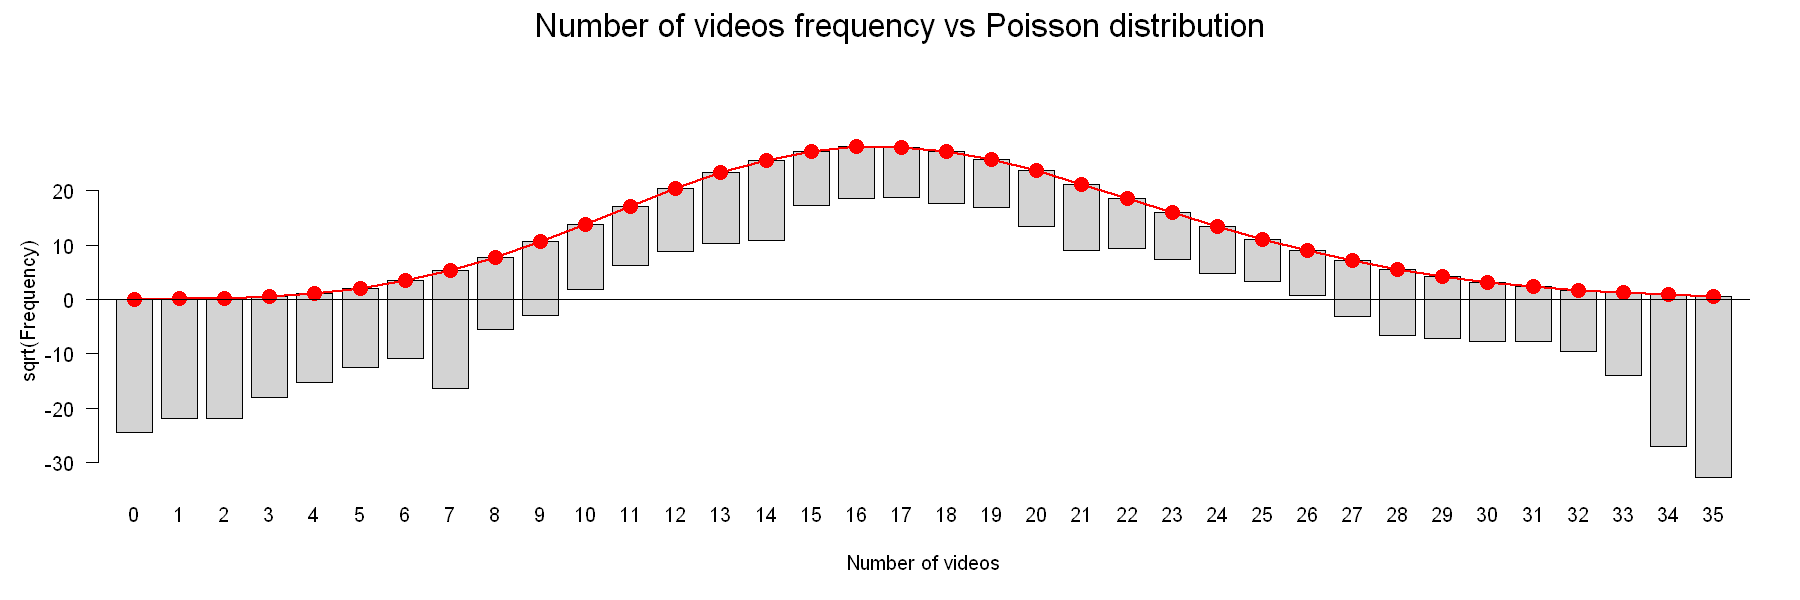

In [340]:
# # load the vcd package
# library(vcd) ## loading vcd package

# # generate two processes for test
# # set.seed(2014);y=rpois(200,5)
# # set.seed(2014);y=rnorm(100, 5, 0.3) # goodfit asks for non-negative values
# # output the results
# gf = goodfit(no.na.data$n.videos,type= "poisson",method= "ML")
# plot(gf,main="Number of videos frequency vs Poisson distribution",xlab='Number of videos')
# summary(gf)

# # to automatically get the pvalue
# gf.summary = capture.output(summary(gf))[[5]]
# pvalue = unlist(strsplit(gf.summary, split = " "))
# pvalue = as.numeric(pvalue[length(pvalue)]); pvalue

# # to mannualy compute the pvalue
# chisq = sum(  (gf$observed-gf$fitted)^2/gf$fitted )

# df = length(gf$observed)-1-1
# pvalue = pchisq(chisq,df)
# print(paste('pvalue: ',pvalue))

In [341]:
(xtable((summary(mod))))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),2.170298127,0.01167140,185.950081,0.000000e+00
Genderune femme,0.008606267,0.00569458,1.511308,1.307099e-01
HDITH,0.732659666,0.01204579,60.822884,0.000000e+00
HDII,0.410040455,0.01639139,25.015596,4.136405e-138


## pseudo R^2

In [470]:
pR2 = 1 - mod$deviance / mod$null.deviance
pR2

numeric(0)

# Survival analysis

In [471]:
tenCols <-list(c(0,0,0,0,0,0,0,0,0,0),
c(1,0,0,0,0,0,0,0,0,0),
c(1,1,0,0,0,0,0,0,0,0),
c(1,1,1,0,0,0,0,0,0,0),
c(1,1,1,1,0,0,0,0,0,0),
c(1,1,1,1,1,0,0,0,0,0),
c(1,1,1,1,1,1,0,0,0,0),
c(1,1,1,1,1,1,1,0,0,0),
c(1,1,1,1,1,1,1,1,0,0),
c(1,1,1,1,1,1,1,1,1,0),
c(1,1,1,1,1,1,1,1,1,1))
dataCols<-list()
for (i in df$behaviour.index.percentage){
    if (as.numeric(i)<0.1){dataCols <- append(dataCols,tenCols[1])}
    if (i>=0.1 & i < 0.2){append(dataCols,tenCols[2])}
    if (i>=0.2 & i < 0.3){append(dataCols,tenCols[3])}
    if (i>=0.3 & i < 0.4){append(dataCols,tenCols[4])}
    if (i>=0.4 & i < 0.5){append(dataCols,tenCols[5])}
    if (i>=0.5 & i < 0.6){append(dataCols,tenCols[6])}
    if (i>=0.6 & i < 0.7){append(dataCols,tenCols[7])}
    if (i>=0.7 & i < 0.8){append(dataCols,tenCols[8])}
    if (i>=0.8 & i < 0.9){append(dataCols,tenCols[9])}
    if (i>=0.9 & i < 1){append(dataCols,tenCols[10])}
    if ( i == 1){append(dataCols,tenCols[11])}
}

In [472]:
str(df$behaviour.index.percentage)

 num [1:17054] 0.0286 0 0.8571 0.7714 0.2857 ...


In [473]:
df$statut.surv.vid=rep(NA, nrow(df))
for (i in 1:nrow(df)) {
    if (df$n.videos[i]<35) {df$statut.surv.vid[i]=1}
    if (df$n.videos[i]==35) {df$statut.surv.vid[i]=0}  }

In [474]:
km_fit <- survfit(Surv(n.videos, statut.surv.vid) ~ 1, data=df)
summary(km_fit)


Call: survfit(formula = Surv(n.videos, statut.surv.vid) ~ 1, data = df)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    0  17054    6313   0.6298 0.00370       0.6226       0.6371
    1  10741    1378   0.5490 0.00381       0.5416       0.5565
    2   9363    1007   0.4900 0.00383       0.4825       0.4975
    3   8356     634   0.4528 0.00381       0.4454       0.4603
    4   7722     430   0.4276 0.00379       0.4202       0.4351
    5   7292     309   0.4095 0.00377       0.4022       0.4169
    6   6983     283   0.3929 0.00374       0.3856       0.4003
    7   6700     746   0.3491 0.00365       0.3420       0.3564
    8   5954     233   0.3355 0.00362       0.3285       0.3426
    9   5721     244   0.3212 0.00358       0.3142       0.3282
   10   5477     194   0.3098 0.00354       0.3029       0.3168
   11   5283     150   0.3010 0.00351       0.2942       0.3079
   12   5133     164   0.2914 0.00348       0.2846       0.2983
   13   4969     209   0.2791 0

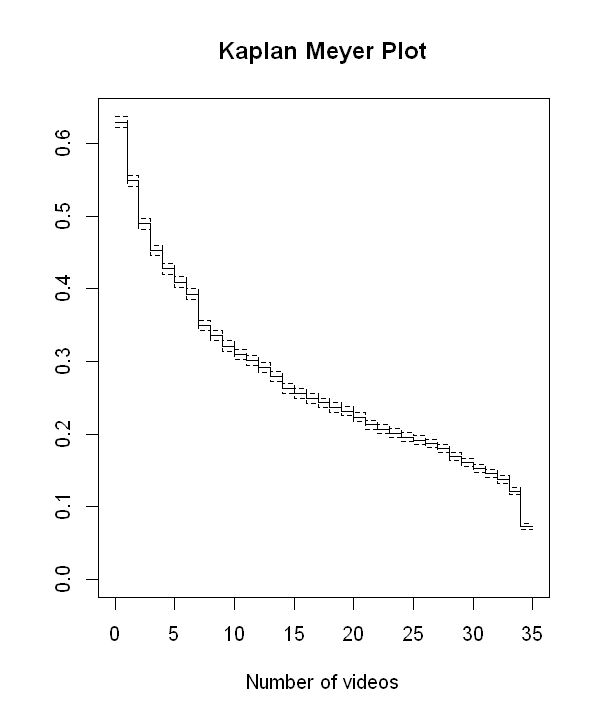

In [475]:
plot(km_fit, xlab="Number of videos", main = 'Kaplan Meyer Plot')

In [476]:
df_categories$statut.surv.vid=rep(NA, nrow(df_categories))
for (i in 1:nrow(df_categories)) {
    if (df_categories$n.videos[i]<35) {df_categories$statut.surv.vid[i]=1}
    if (df_categories$n.videos[i]==35) {df_categories$statut.surv.vid[i]=0}  }


In [477]:
# completers <- subset(df2_NecCol_clean, Exam.bin == 1)

# auditing <- df2_NecCol_clean[which(df2_NecCol_clean$Quizz.1.bin ==0
#                                     & df2_NecCol_clean$Quizz.2.bin ==0
#                                     & df2_NecCol_clean$Quizz.3.bin ==0
#                                     & df2_NecCol_clean$Quizz.4.bin ==0
#                                     & df2_NecCol_clean$Quizz.5.bin ==0
#                                     & df2_NecCol_clean$Assignment.bin ==0
#                                     & df2_NecCol_clean$behaviour.index.percentage > 0.1),]
# bystanders <- df2_NecCol_clean[which(df2_NecCol_clean$Quizz.1.bin ==0
#                                     & df2_NecCol_clean$Quizz.2.bin ==0
#                                     & df2_NecCol_clean$Quizz.3.bin ==0
#                                     & df2_NecCol_clean$Quizz.4.bin ==0
#                                     & df2_NecCol_clean$Quizz.5.bin ==0
#                                     & df2_NecCol_clean$Assignment.bin ==0
#                                     & df2_NecCol_clean$behaviour.index.percentage <= 0.1),]

# bystanders<-anti_join(bystanders, auditing)


# disengaging <- anti_join(df2_NecCol_clean, do.call("rbind", list(completers,auditing,bystanders)))
# disengaging<-anti_join(disengaging, completers)


# completers$behaviour = 'Completer'


# disengaging$behaviour = 'Disenganger'

# auditing$behaviour = 'Auditer'

# bystanders$behaviour = 'Bystander'
# df_categories <- do.call("rbind", list(completers,auditing,bystanders,disengaging))


# km_fit <- survfit(Surv(n.videos, statut.surv.vid) ~ behaviour, data=df_categories)
# plot(km_fit, xlab="Number of videos", main = 'Kaplan Meyer Plot')


df$engagement.behaviour <- NA
# df[which(df$Quizz.1.bin ==0
#         & df$Quizz.2.bin ==0
#         & df$Quizz.3.bin ==0
#         & df$Quizz.4.bin ==0
#         & df$Quizz.5.bin ==0
#         & df$Assignment.bin ==0
#         & df$behaviour.index.percentage > 0.1),]engagement.behaviour <- 'Auditer'
# df$d[df$a==5] <- 0
# df$d[df$a==6] <- df$b[df$a==6]

In [478]:
df[which(df$Quizz.1.bin ==0
        & df$Quizz.2.bin ==0
        & df$Quizz.3.bin ==0
        & df$Quizz.4.bin ==0
        & df$Quizz.5.bin ==0
        & df$Assignment.bin ==0
        & df$behaviour.index.percentage > 0.1),]$engagement.behaviour <- 'Auditer' 


df[which(df$Exam.bin == 1),]$engagement.behaviour <- 'Completer'


df[which(df$Quizz.1.bin ==0
        & df$Quizz.2.bin ==0
        & df$Quizz.3.bin ==0
        & df$Quizz.4.bin ==0
        & df$Quizz.5.bin ==0
        & df$Assignment.bin ==0
        & df$behaviour.index.percentage <= 0.1),]$engagement.behaviour <- 'Bystander'


df$engagement.behaviour[is.na(df$engagement.behaviour)] <- 'Disengager'

In [479]:
head(df)

Student_ID,Exam.score,Exam.bin,Assignment.score,Assignment.bin,Quizz.1.score,Quizz.1.bin,Quizz.2.score,Quizz.2.bin,Quizz.3.score,...,Proba.reco,EMLyon.et,Certif.bin,EMLYON.et,age,HDI,n.videos,behaviour.index.percentage,statut.surv.vid,engagement.behaviour
28,NA,0,NA,0,NA,0,NA,0,NA,...,NA,NA,NA,NA,NA,NA,1,0.02857143,1,Bystander
36,NA,0,NA,0,NA,0,NA,0,NA,...,NA,NA,NA,NA,NA,NA,0,0.00000000,1,Bystander
45,NA,0,NA,0,16,1,20,1,18,...,NA,NA,NA,NA,NA,TH,30,0.85714286,1,Disengager
83,NA,0,60,1,13,1,20,1,18,...,NA,NA,NA,NA,NA,I,27,0.77142857,1,Disengager
84,NA,0,NA,0,18,1,20,1,NA,...,NA,NA,NA,NA,NA,B,10,0.28571429,1,Disengager
87,NA,0,NA,0,NA,0,NA,0,NA,...,NA,NA,NA,NA,NA,TH,2,0.05714286,1,Bystander


In [480]:
n.videos_dec = quantile(df$n.videos, probs = seq(.1, .9, by = .1))



df<-df %>%mutate(n.videos.decile = ntile(n.videos, 10))



df$status.vid=rep(NA, nrow(df))
for (i in 1:nrow(df)) {
    if (df$n.videos.decile[i]<10) {df$status.vid[i]=1}
    if (df$n.videos.decile[i]==10) {df$status.vid[i]=0}
}


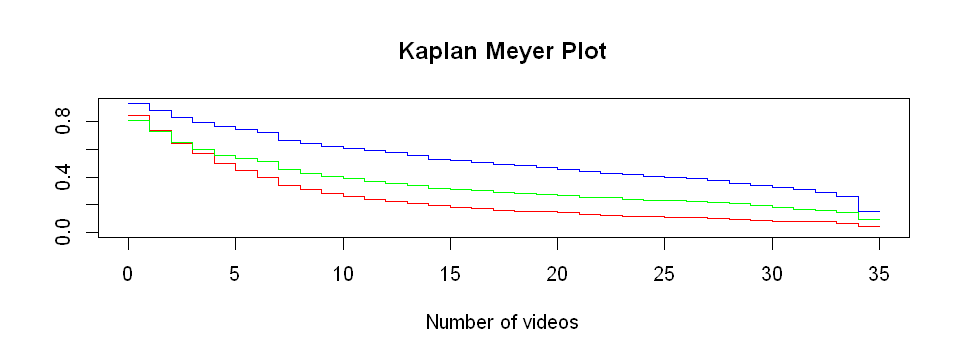

In [494]:
km_fit <- survfit(Surv(n.videos, statut.surv.vid) ~ HDI, data=df)
plot(km_fit, xlab="Number of videos", main = 'Kaplan Meyer Plot', col=c('red','blue','green','yellow')) 

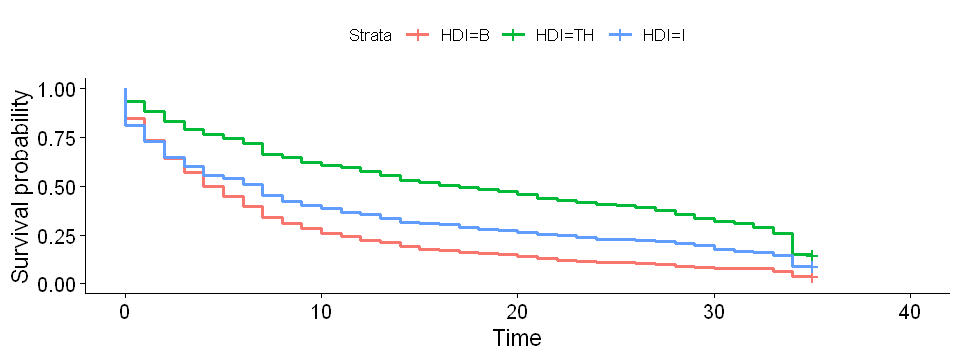

In [495]:
fit2 <- survfit(Surv(n.videos, statut.surv.vid) ~ HDI, data=df)
ggsurvplot(fit2, data = df)

## main plot

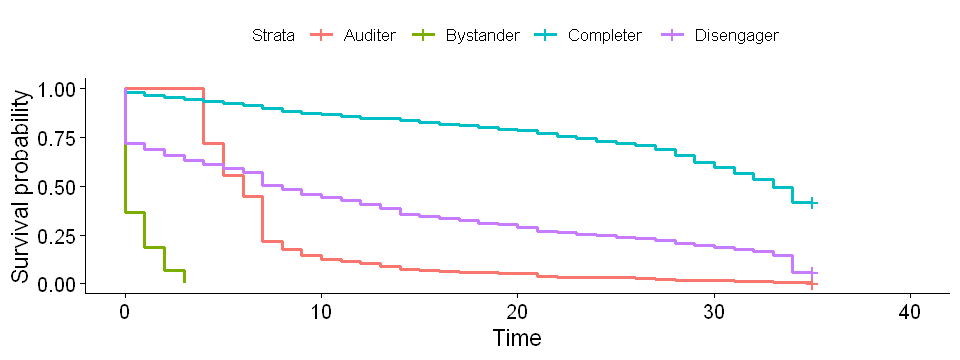

In [496]:
fit <- survfit(Surv(n.videos, statut.surv.vid) ~ engagement.behaviour, data=df)
names(fit$strata) <- gsub("engagement.behaviour=", "", names(fit$strata))
ggsurvplot(fit, data = df, surv.median.line="none")

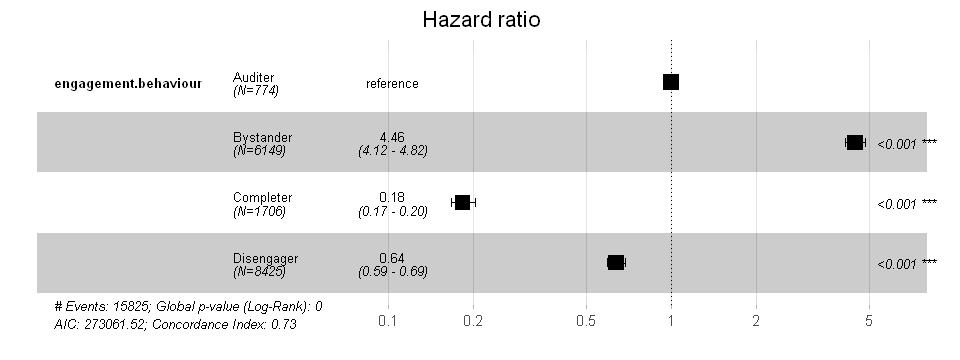

In [497]:
mod_cox <- coxph(formula = Surv(n.videos, statut.surv.vid) ~ engagement.behaviour, data = df)
ggforest(mod_cox,data=df)

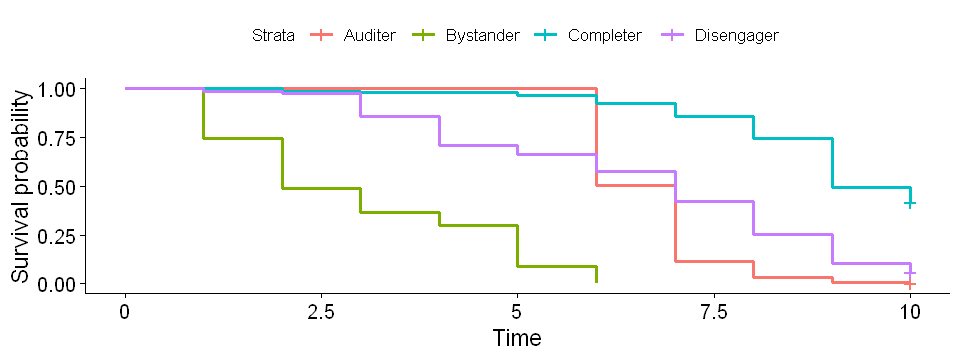

In [498]:
fit <- survfit(Surv(n.videos.decile, statut.surv.vid) ~ engagement.behaviour, data=df)
names(fit$strata) <- gsub("engagement.behaviour=", "", names(fit$strata))
ggsurvplot(fit, data = df, surv.median.line="none")

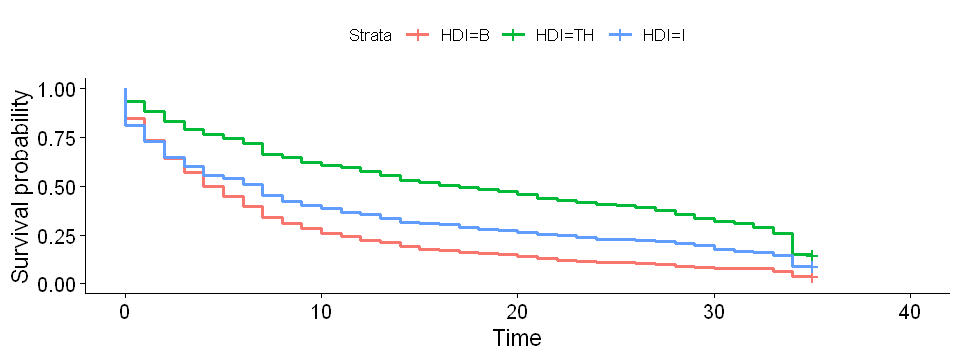

In [499]:
fit2 <- survfit(Surv(n.videos, statut.surv.vid) ~ HDI, data=df)
ggsurvplot(fit2, data = df)

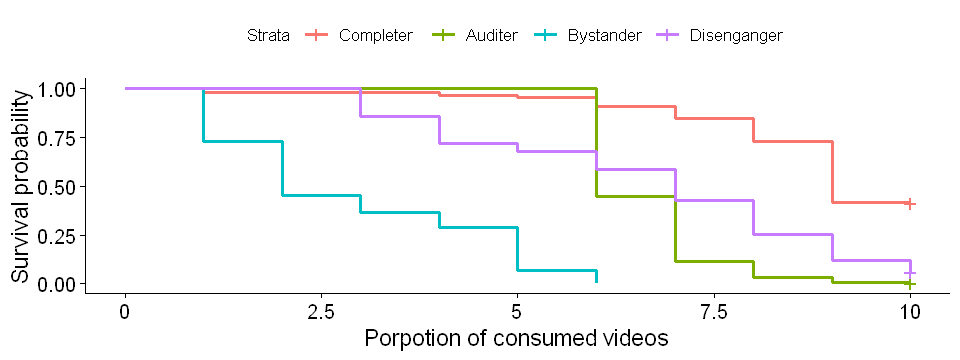

In [500]:
n.videos_dec = quantile(df_categories$n.videos, probs = seq(.1, .9, by = .1))



df_categories<-df_categories %>%mutate(n.videos.decile = ntile(n.videos, 10))



df_categories$status.vid=rep(NA, nrow(df_categories))
for (i in 1:nrow(df_categories)) {
    if (df_categories$n.videos.decile[i]<10) {df_categories$status.vid[i]=1}
    if (df_categories$n.videos.decile[i]==10) {df_categories$status.vid[i]=0}
}



fit <- survfit(Surv(n.videos.decile, statut.surv.vid) ~ behaviour, data=df_categories)
names(fit$strata) <- gsub("behaviour=", "", names(fit$strata))
ggsurvplot(fit, data = df_categories, surv.median.line="none",xlab = "Porpotion of consumed videos")

In [501]:
df_categories$behaviour <- as.factor(df_categories$behaviour)
df_categories$behaviour = relevel(df_categories$behaviour, ref = "Completer")

In [502]:
library("survival")
library("survminer")

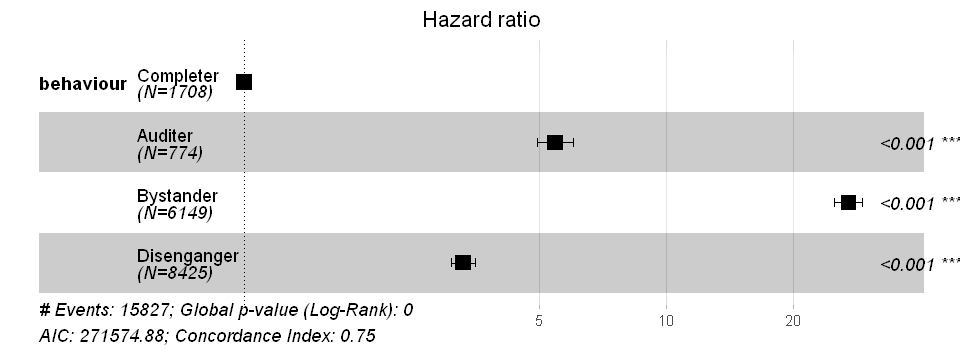

In [503]:
options(repr.plot.width=8, repr.plot.height=3)
mod_cox <- coxph(formula = Surv(n.videos.decile, statut.surv.vid) ~ behaviour, data=df_categories)
# a <- ggforest(mod_cox)
# ggforest(mod_cox, font.x.size = 20)

ggforest(mod_cox, fontsize = 1,
  cpositions = c(0,0.11,3),data=df_categories)

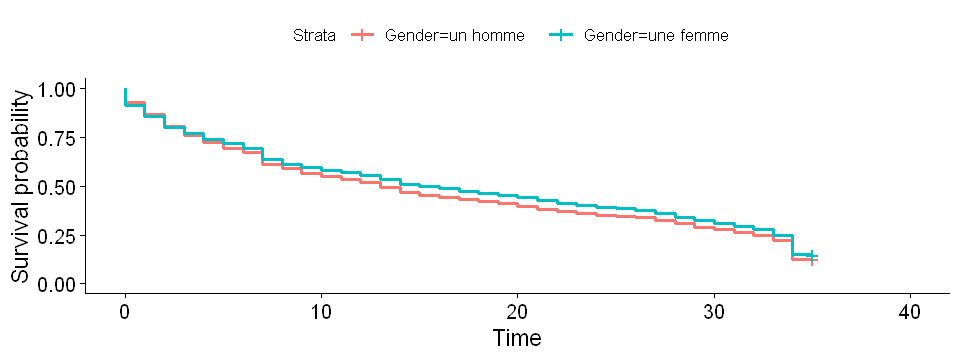

In [504]:
fit2 <- survfit(Surv(n.videos, statut.surv.vid) ~ Gender, data=df)
ggsurvplot(fit2, data = df)

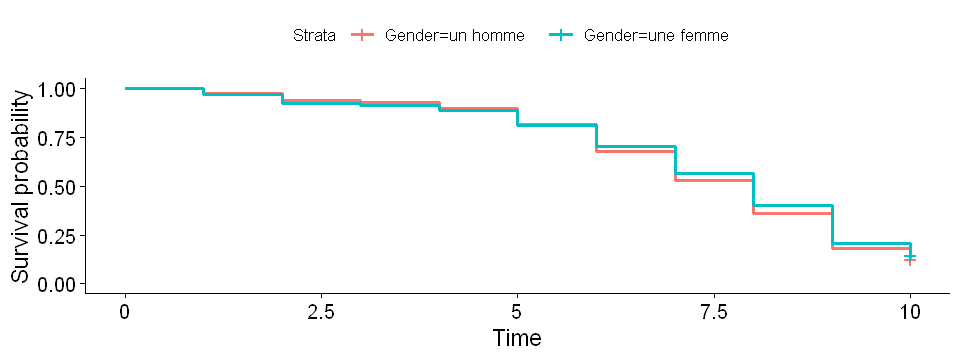

In [505]:
fit2 <- survfit(Surv(n.videos.decile, statut.surv.vid) ~ Gender, data=df)
ggsurvplot(fit2, data = df)

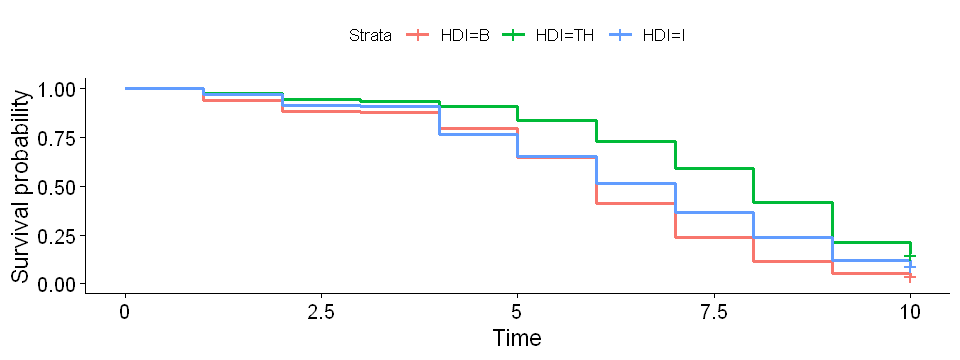

In [506]:
fit2 <- survfit(Surv(n.videos.decile, statut.surv.vid) ~ HDI, data=df)
ggsurvplot(fit2, data = df)

ERROR: Error in ggsurvplot(mod_cox, conf.int = TRUE, palette = "Dark2", censor = FALSE, : objet 'ggsurv' introuvable


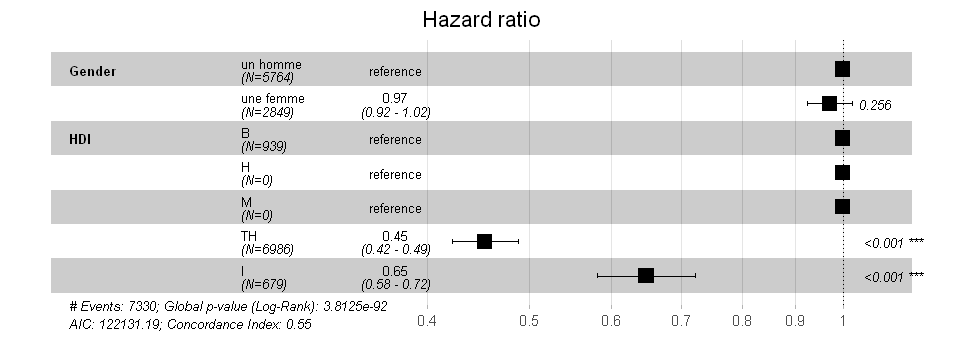

In [507]:
mod_cox <- coxph(formula = Surv(n.videos, statut.surv.vid) ~ Gender + HDI, data = df)
ggforest(mod_cox,data=df)
ggsurvplot(mod_cox, conf.int = TRUE, palette = "Dark2",censor = FALSE, surv.median.line = "hv")

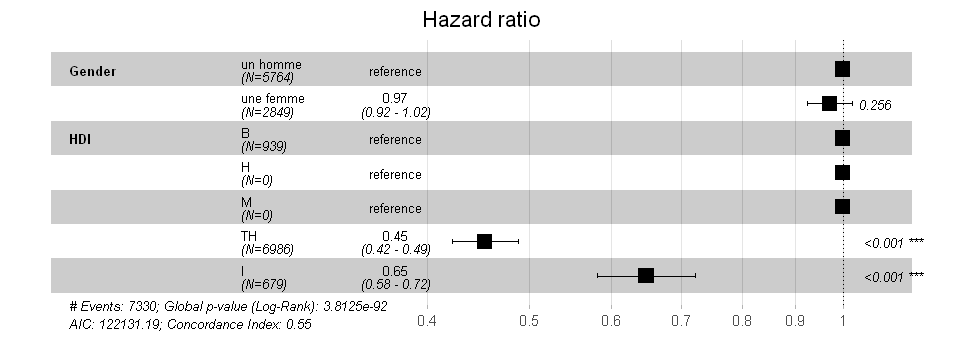

In [508]:
ggforest(mod_cox,data=df)

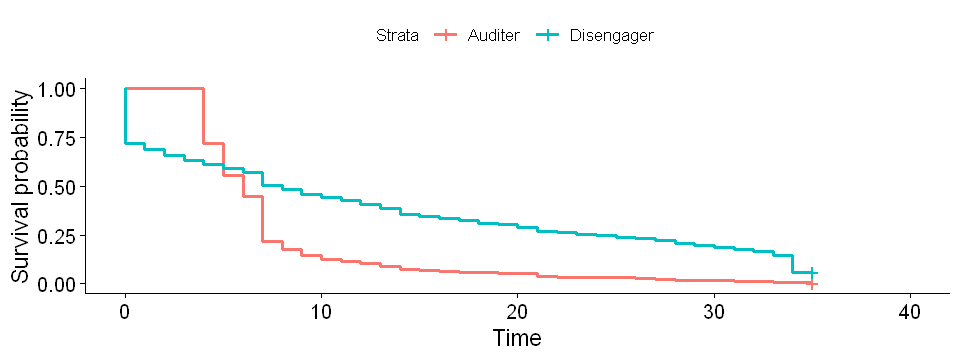

In [509]:
fit <- survfit(Surv(n.videos, statut.surv.vid) ~ engagement.behaviour, data=df[df$engagement.behaviour %in% c('Disengager','Auditer'),])
names(fit$strata) <- gsub("engagement.behaviour=", "", names(fit$strata))
ggsurvplot(fit, data = df, surv.median.line="none")

In [510]:
survdiff(Surv(n.videos, statut.surv.vid) ~ engagement.behaviour, data=df[df$engagement.behaviour %in% c('Disengager','Auditer'),])

Call:
survdiff(formula = Surv(n.videos, statut.surv.vid) ~ engagement.behaviour, 
    data = df[df$engagement.behaviour %in% c("Disengager", "Auditer"), 
        ])

                                   N Observed Expected (O-E)^2/E (O-E)^2/V
engagement.behaviour=Auditer     774      770      497    149.70       192
engagement.behaviour=Disengager 8425     7911     8184      9.09       192

 Chisq= 192  on 1 degrees of freedom, p= <2e-16 